In [36]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("ProjectDL/Ansätze"))
import pandas as pd
import numpy as np
data=pd.read_csv('oil.csv')

# Any results you write to the current directory are saved as output.



In [37]:
data.head()

,Date,Price
0,20.05.1987,18.63
1,21.05.1987,18.45
2,22.05.1987,18.55
3,25.05.1987,18.60
4,26.05.1987,18.63


In [38]:
data.shape

(8059, 2)

In [39]:
import matplotlib
from matplotlib import pyplot as  plt

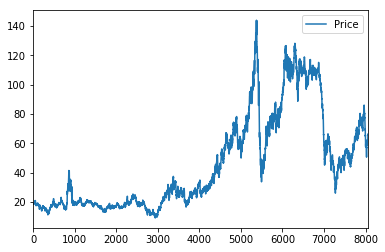

In [40]:
%matplotlib inline
data.plot()

We can  see an upward trend in the dataset over time.

In [41]:
# Evaluating Long Short-Term Memory Network on oil prices

In [42]:
dataset = data['Price'].values
dataset = dataset.astype('float32')
dataset

array([18.63, 18.45, 18.55, ..., 65.65, 66.41, 65.86], dtype=float32)

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))
dataset

array([[0.07067111],
       [0.06933631],
       [0.07007787],
       ...,
       [0.41935486],
       [0.42499077],
       [0.42091215]], dtype=float32)

In [44]:
 # split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

5399 2660


In [45]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [46]:
# reshape into X=t and Y=t+1
import numpy
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [47]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [48]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
#model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
5397/5397 - 13s - loss: 0.0074
Epoch 2/10
5397/5397 - 11s - loss: 5.0826e-05
Epoch 3/10
5397/5397 - 11s - loss: 5.1926e-05
Epoch 4/10
5397/5397 - 12s - loss: 5.1860e-05
Epoch 5/10
5397/5397 - 12s - loss: 5.2247e-05
Epoch 6/10
5397/5397 - 12s - loss: 5.0119e-05
Epoch 7/10
5397/5397 - 11s - loss: 5.1119e-05
Epoch 8/10
5397/5397 - 11s - loss: 4.9533e-05
Epoch 9/10
5397/5397 - 11s - loss: 5.0715e-05
Epoch 10/10
5397/5397 - 11s - loss: 5.1571e-05


In [49]:
import math
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1,1))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1,1))
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.97 RMSE
Test Score: 2.00 RMSE


In [50]:
from math import sqrt
trainScore = (mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = (mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Train Score: 0.95 MSE
Test Score: 4.01 MSE


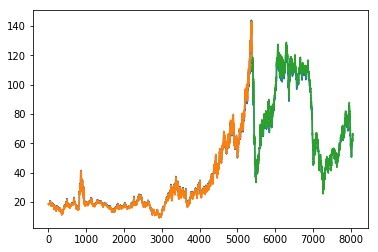

In [51]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()